In [1]:
import os

import tensorflow as tf
import PIL
import sewar.full_ref
from IPython.display import clear_output, display

import src.model
import src.utils
import src.vizualization

In [2]:
src.model.NSTImageTrainer.model_layers_names()

['input_1',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [3]:
BASE_RESULT_PATH = os.path.join("images", "results")
BASE_TRAINER_PATH = os.path.join("images", "trainers")

style_image_path = os.path.join("images", "styles", "hollowknight_dark.jpg")
content_image_path = os.path.join("images", "contents", "ace_of_spages.png")

style_image = src.utils.tf_utils.load_img(style_image_path)
content_image = src.utils.tf_utils.load_img(content_image_path)

# perun, picasso
style_layers = ['block1_conv1', 'block2_conv2', 'block2_conv2', 'block3_conv1', 'block3_conv3', 'block4_conv2', 'block4_conv4', 'block5_conv1', 'block5_conv4']

# regularr
# style_layers = ['block1_pool', 'block2_pool', 'block3_pool', 'block4_pool', 'block5_pool']



# beggining
# content_layers = ['block1_conv1']

# mid
# content_layers = ['block3_conv3']

# end
content_layers = ['block5_conv4']



In [4]:
trainer = src.model.NSTImageTrainer(
    style_image, 
    content_image, 
    style_layers,
    content_layers,
)
trainer.compile(tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1))

TypeError: 'StyleContentExtractor' object is not callable

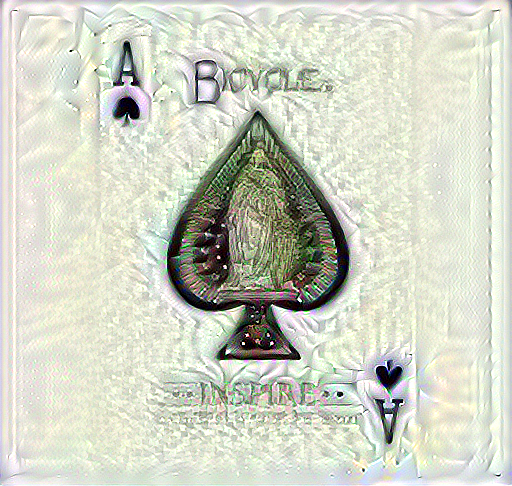

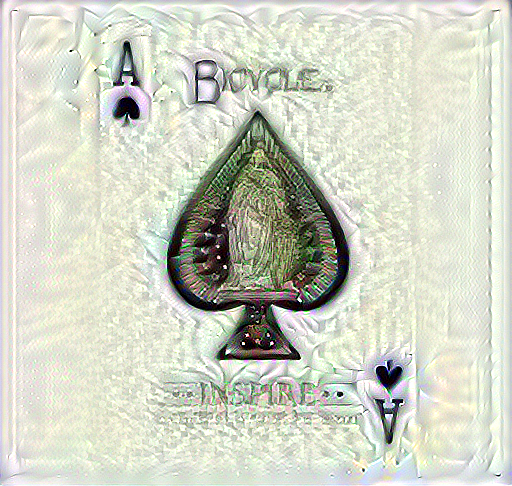

In [ ]:
def display_output_image():
    display(trainer.output_image)
    
callbacks = [clear_output, display_output_image]
trainer.training_loop(steps_per_epoch=3, epochs=5, callbacks=callbacks)

In [ ]:
assert False

AssertionError: 

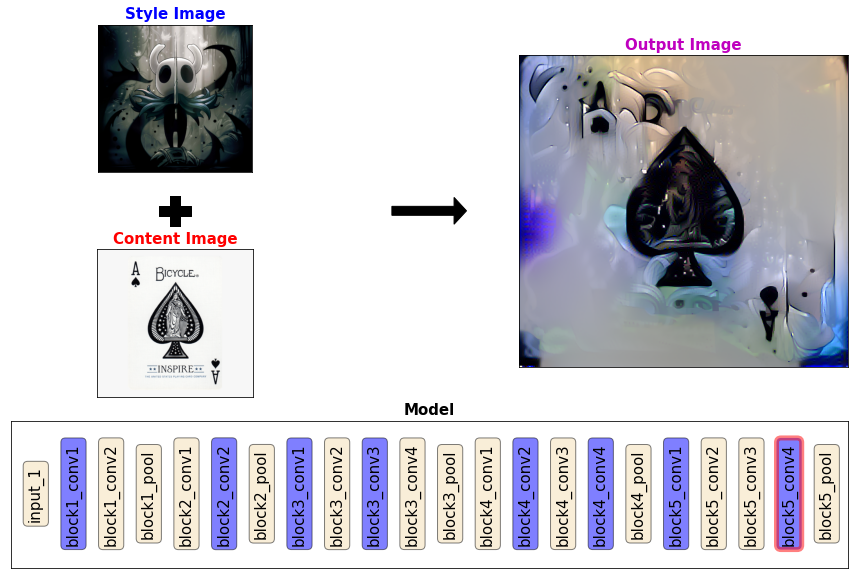

In [ ]:
src.vizualization.save_vizualizations(
    trainer,
    style_image_path,
    content_image_path,
    BASE_RESULT_PATH,
    BASE_TRAINER_PATH
)